<a href="https://colab.research.google.com/github/mshamesh/HumanActivityRecognition/blob/TrialBranch/Smartphones_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Activity Recognition with Smartphones Dataset**
## Group 150

**Group Members - MALAVIKA SHAMESH (2020SC04290),
                  SRUTHY ANN JOSEPH, 
                  YAMINI N (2020SC04076)**

**Logistic Regression**

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable.

A regression model that uses L1 regularization technique is called Lasso Regression and model which uses **L2 is called Ridge Regression.**

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.

**L2-norm** loss function is also known as least squares error (LSE). 
∑ (wj )² is a regularization term and ∑ [log(1+exp(-zi))] is the Loss term. λ is a hyper parameter. We added the regularization term(i.e. squared magnitude) to the loss term to make sure that the model does not undergo overfit problem

# **1. Import Libraries/Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import *
from sklearn.feature_selection import *
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to import data set into colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Data Visualization and Exploration**

## 1. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
#To read data from data set 

activity_data = pd.read_csv("/content/drive/MyDrive/Human_activity_Dataset.csv")
activity_data.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.80276,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.0,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.90016,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.0,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING


In [ ]:
## Removing ()

activity_data.columns = activity_data.columns.str.replace('[()]','')
activity_data.columns = activity_data.columns.str.replace('[-]','')
activity_data.columns = activity_data.columns.str.replace('[,]','')

In [ ]:
# To identify all features in data set

activity_data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject/Participant',
       'Activity'],
      dtype='object', length=563)

In [ ]:
# Number of rows and columns

activity_data.shape

(10299, 563)

In [ ]:
# To print data set info

activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAccmeanX to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


##2. Print the description and Basic statistical details.

In [ ]:
activity_data.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject/Participant
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,-0.305180,-0.562230,0.525304,0.389537,0.598022,-0.552087,-0.825460,-0.902704,-0.854662,-0.689162,-0.643512,-0.640686,-0.100332,-0.128765,-0.157863,-0.118954,0.108574,-0.035699,0.122000,-0.029677,0.031724,0.155148,-0.018077,0.006110,0.037729,0.034424,-0.082669,-0.120309,-0.197746,0.102199,...,-0.676629,-0.338469,-0.877800,0.173220,-0.298598,-0.601659,-0.697411,-0.699976,-0.681014,-0.734623,-0.888701,-0.697411,-0.881301,-0.722125,-0.076279,-0.886999,-0.041564,-0.264279,-0.575866,-0.779768,-0.792190,-0.773404,-0.809934,-0.871201,-0.779768,-0.937898,-0.772715,-0.274339,-0.900033,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,0.279920,0.282991,0.356589,0.338844,0.290615,0.461375,0.247052,0.125988,0.205998,0.359209,0.368865,0.372065,0.462315,0.433687,0.368102,0.307721,0.247140,0.247820,0.232044,0.254461,0.213708,0.208718,0.220257,0.281722,0.215456,0.236854,0.230957,0.357677,0.325103,0.376049,...,0.365550,0.666857,0.189655,0.252537,0.364723,0.353928,0.323701,0.310443,0.331222,0.281107,0.163587,0.323701,0.180432,0.310562,0.602930,0.159981,0.280142,0.322579,0.320006,0.

##3. Print each class label count (Activity) and create a pie chart for each class (% of data distribution). Write your observation on data balancing.

In [ ]:
# To get each class label count

activity_data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

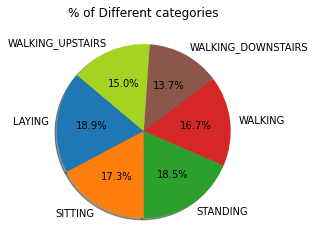

In [ ]:
x = activity_data['Activity'].groupby(activity_data['Activity']).count().index
activities = activity_data['Activity'].groupby(activity_data['Activity']).count().values
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b","#a4d321"]
plt.pie(activities, labels=x,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

It can be observed that a higher percentage (almost 19%) of activity tracked was spent laying while a comparitively lower percentage (almost 14%) was spent walking downstairs. 
There is no any huge amount of gap between them. Therefore, we can say that data is balanced.

##4. Plot Activities by Subject/Participants and Provide appropriate comments on visualized data.

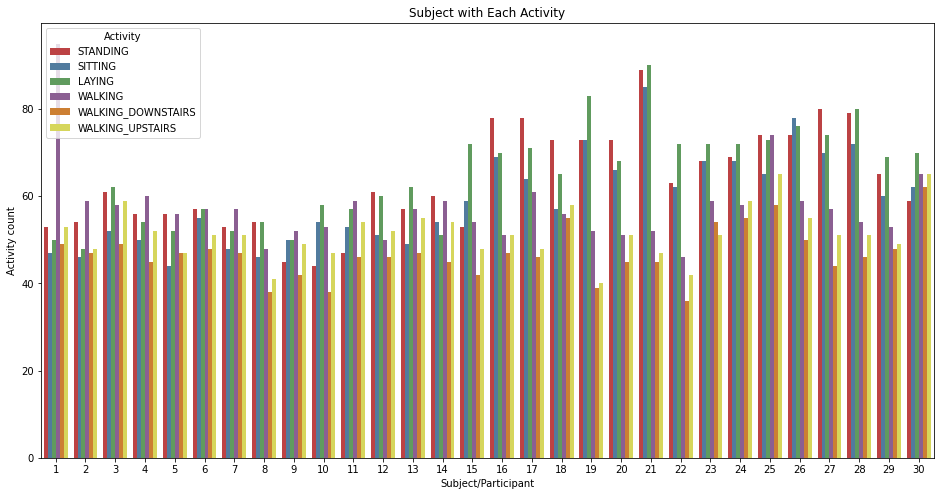

In [ ]:
plt.figure(figsize = (16,8))
plt.title("Subject with Each Activity")
ax = sns.countplot(hue = 'Activity', x='subject/Participant',data = activity_data);
ax.set(xlabel='Subject/Participant', ylabel='Activity count')
plt.show()

As mentioned in legend, blue denotes standing, orange denotes sitting, green denotes laying, red denotes walking, purple denotes walking downstairs and brown denotes walking upstairs. The highest activity tracked was walking for subject 1 and the lowest activity tracked was that of walking downstairs for subject 22. Also as a general trend, it can be observed that there is a general increase in the activities from subject 15 onwards.

##5. Try exploring the data and see what insights can be drawn from the dataset.

**1. Static and Dynamic Activites**


Static activities are (sit, stand, lie and down) activities where there is no motion of any object.
Dynamic activities are (Walking, WalkingUpStairs, WalkingDownStairs) activities where motion info will be significant.

**2. Stationary and Moving activities are completely different**

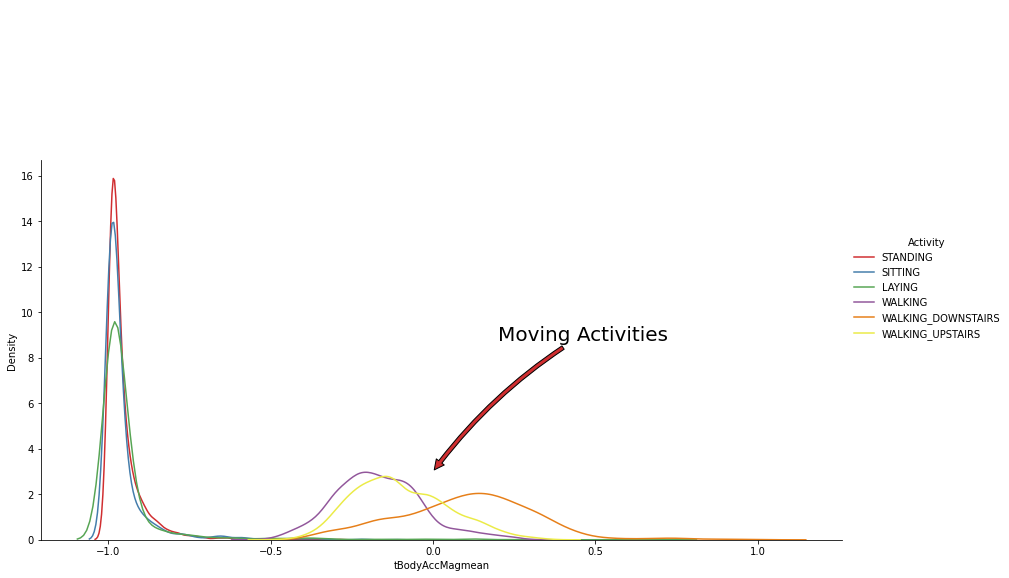

In [ ]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(activity_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

Taking a closer look..

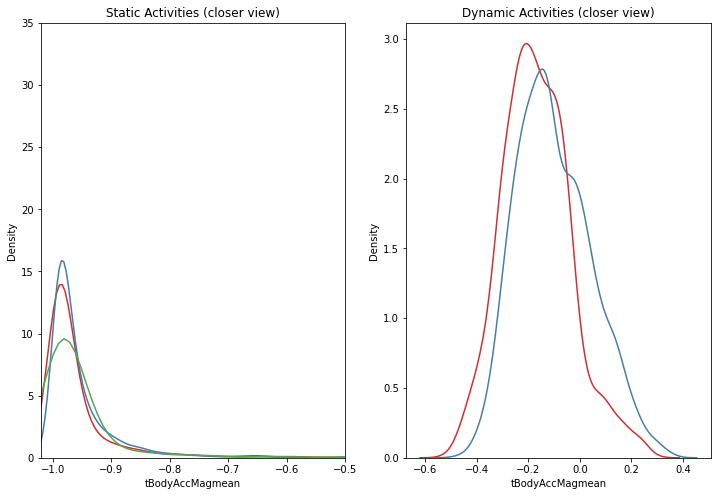

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.title("Static Activities (closer view)")
sns.distplot(activity_data[activity_data["Activity"]=="SITTING"]['tBodyAccMagmean'], hist = False, label = 'Sitting');
sns.distplot(activity_data[activity_data["Activity"]=="STANDING"]['tBodyAccMagmean'], hist = False, label = 'Standing');
sns.distplot(activity_data[activity_data["Activity"]=="LAYING"]['tBodyAccMagmean'], hist = False, label = 'Laying');
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities (closer view)")
sns.distplot(activity_data[activity_data["Activity"]=="WALKING"]["tBodyAccMagmean"], hist = False, label ="Sitting");
sns.distplot(activity_data[activity_data["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMagmean'], hist = False, label = 'Laying');

Using a box plot to visualise..

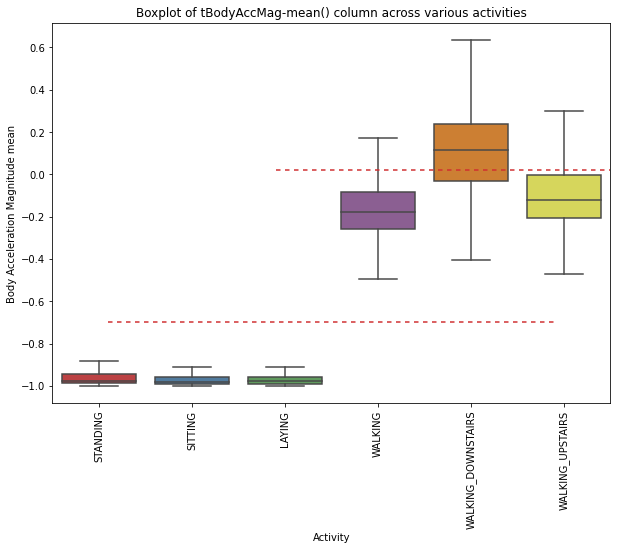

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y ='tBodyAccMagmean', data = activity_data, showfliers = False);
plt.ylabel('Body Acceleration Magnitude mean')
plt.title('Boxplot of tBodyAccMag-mean() column across various activities')
plt.axhline(y =- 0.7, xmin = 0.1, xmax = 0.9, dashes = (3,3))
plt.axhline(y = 0.020, xmin = 0.4, dashes = (3,3))
plt.xticks(rotation = 90)
plt.show()

Using boxplot, we can come up with conditions to seperate static activities from dynamic activities.

if(tBodyAccMagmean <= -0.8):
      Activity = "static"
  if(tBodyAccMagmean >= -0.6):
      Activity = "dynamic"

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

if (tBodyAccMagmean > 0.02):
    Activity = "WALKING_DOWNSTARIS"
else:
    Activity = "others"

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as others so this condition makes an error of 25% in classification.

**3. Analysing Angle between X-axis and gravityMean feature**

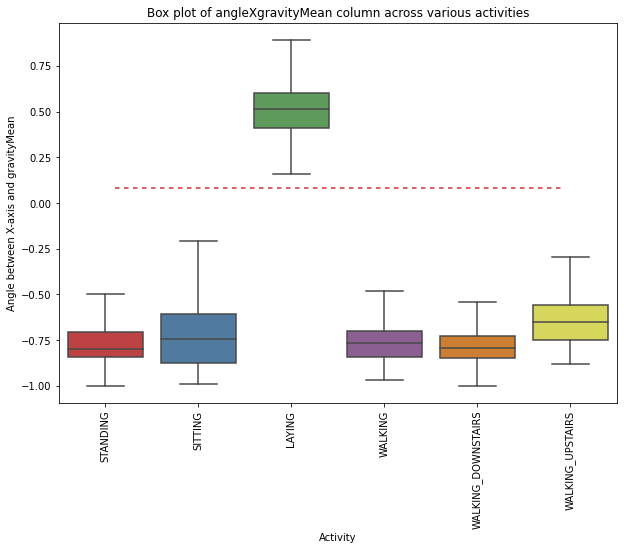

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleXgravityMean', data = activity_data, showfliers = False)
plt.axhline(y = 0.08, xmin = 0.1 , xmax = 0.9, dashes = (3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title("Box plot of angleXgravityMean column across various activities")
plt.xticks(rotation = 90)
plt.show()

We can see that 

1.   If angleXgravityMean > 0.01 then Activity is Laying
2.   We can classify all datapoints belonging to Laying activity with just a single if else statement


**4. Analysing Angle between Y-axis and gravityMean feature**

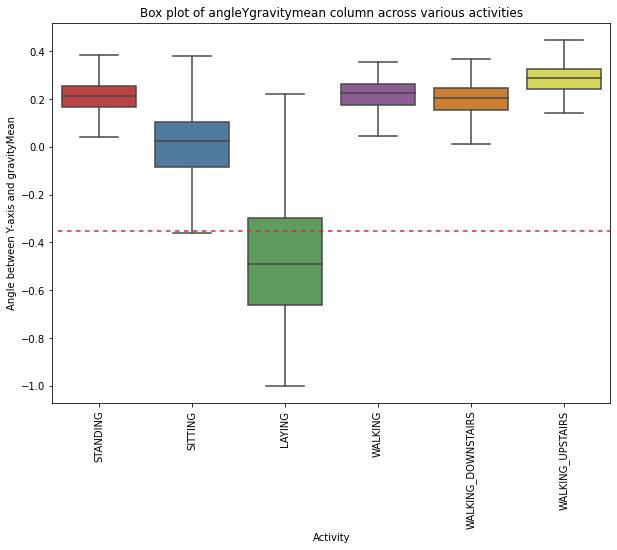

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Activity', y = 'angleYgravityMean', data = activity_data, showfliers = False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title("Box plot of angleYgravitymean column across various activities")
plt.xticks(rotation = 90)
plt.axhline(y = -0.35, xmin = 0.01, dashes = (3,3))
plt.show()

**5. Visualizing data using t-SNE**

Using t-SNE data can be visualized from a extermely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unique featuers, using t-SNE let's visualze it to a 2D space.

In [ ]:
X_for_tsne = activity_data.drop(['subject/Participant','Activity'], axis = 1)

In [ ]:
%time
tsne = TSNE(random_state = 42, n_components = 2, verbose = 1, perplexity = 50, n_iter = 1000).fit_transform(X_for_tsne)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.004s...
[t-SNE] Computed neighbors for 10299 samples in 2.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.385627
[t-SNE] KL divergence af

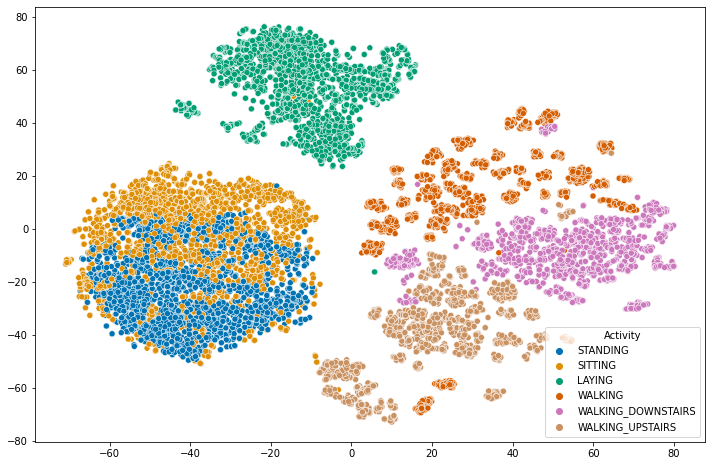

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:,1], hue = activity_data["Activity"], palette = "colorblind")

Observations:


*   Laying is in a completely different position.
*   Walking, Walking_downstairs, Walking_upstairs are kind of similar, so they are clustered together.
*   Standing and Sitting are also somewhat in same position, therefore similar.

# **2. Data Pre-processing and cleaning**

##1. Identify NULL or Missing Values based on column. Apply appropriate feature engineering techniques for them.

In [ ]:
percent_null = activity_data.isnull().sum() * 100 / len(activity_data)
null_value_df = pd.DataFrame({'Percentage_missing': percent_null})
# missing_value_df.sort_values('percent_missing', inplace=True)
z = null_value_df[null_value_df['Percentage_missing'] > 0]
if len(z.index) > 0:
  print (z)
else:
  print("No null values")

No null values


In [ ]:
# To drop all null or missing values
activity_data_na = activity_data.dropna()
print(activity_data_na)

       tBodyAcc-mean()-X  ...          Activity
0               0.288585  ...          STANDING
1               0.278419  ...          STANDING
2               0.279653  ...          STANDING
3               0.279174  ...          STANDING
4               0.276629  ...          STANDING
...                  ...  ...               ...
10294           0.310155  ...  WALKING_UPSTAIRS
10295           0.363385  ...  WALKING_UPSTAIRS
10296           0.349966  ...  WALKING_UPSTAIRS
10297           0.237594  ...  WALKING_UPSTAIRS
10298           0.153627  ...  WALKING_UPSTAIRS

[10299 rows x 563 columns]


##2. Use MinMax normalization for feature transformation.

In [ ]:
# Created a copy of data frame and removed activity and subject columns

activity_data_copy = activity_data.copy()
activity_data_copy.drop(
    labels = ['Activity', 'subject/Participant'],
    axis = 1,
    inplace = True
)

In [ ]:
# Normalised data using min-max normalisation

normalized_df=(activity_data_copy-activity_data_copy.min())/(activity_data_copy.max()-activity_data_copy.min())
normalized_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.644292,0.489853,0.433547,0.002361,0.008445,0.043237,0.002444,0.008408,0.038236,0.032638,0.216311,0.127794,0.926474,0.842922,0.907131,0.017239,0.000028,0.000068,0.002694,0.002885,0.006193,0.028390,0.296126,0.160331,0.198939,0.964647,0.073494,0.679955,0.470737,0.628446,0.387576,0.632053,0.452377,0.639426,0.267458,0.745968,0.404558,0.688157,0.717565,0.830395,...,0.000041,0.004318,0.000000,0.031746,0.673494,0.241960,0.098620,0.009933,0.019345,0.013173,0.023868,0.005251,0.009933,0.000380,0.003672,0.149354,0.000000,0.435506,0.793078,0.687302,0.004005,0.004651,0.005030,0.003776,0.004476,0.004005,0.000032,0.004771,0.064347,0.000000,0.462838,0.350662,0.144848,0.443623,0.515200,0.267619,0.490777,0.079377,0.589970,0.470687
1,0.639209,0.491795,0.438240,0.000877,0.012350,0.019839,0.000596,0.012543,0.021157,0.028466,0.221074,0.090796,0.924654,0.842922,0.911318,0.009035,0.000004,0.000106,0.000797,0.000425,0.011067,0.025888,0.142554,0.249535,0.214510,0.805814,0.335226,0.642107,0.642297,0.557853,0.454519,0.647155,0.359395,0.542994,0.488924,0.491672,0.389678,0.493286,0.463654,0.789691,...,0.000067,0.004433,0.000000,0.079365,0.766030,0.187565,0.049920,0.005852,0.008339,0.008670,0.006840,0.004086,0.005852,0.000094,0.003011,0.139659,0.025641,0.364021,0.331845,0.139992,0.002073,0.001800,0.002279,0.001567,0.002780,0.002073,0.000010,0.002728,0.000000,0.000000,0.579037,0.202475,0.069250,0.526738,0.496283,0.133687,0.851755,0.077606,0.590144,0.472842
2,0.639827,0.490266,0.443269,0.002310,0.016406,0.010528,0.001740,0.018166,0.011266,0.030654,0.221074,0.090796,0.921804,0.841200,0.919672,0.008261,0.000015,0.000170,0.000265,0.001435,0.017595,0.012663,0.203882,0.257090,0.214510,0.636512,0.456846,0.668601,0.417631,0.508575,0.462747,0.671128,0.333718,0.619640,0.431898,0.586932,0.350254,0.437651,0.409448,0.804450,...,0.000077,0.006671,0.000000,0.047619,0.830398,0.137652,0.035730,0.005373,0.006986,0.007863,0.004510,0.002149,0.005373,0.000073,0.003381,0.131739,0.102564,0.393636,0.232324,0.064043,0.002485,0.002436,0.002680,0.001970,0.002067,

##3. Do the correlational analysis on the dataset. Provide a visualization for the same.

In [ ]:
# To calculate correlation between varables

normalized_df.corr()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,-0.007160,-0.063463,0.075945,0.014040,-0.008399,-0.022104,0.022322,-0.027758,-0.071459,0.025111,-0.019118,-0.045154,0.142928,0.005005,-0.076582,0.019124,0.011382,-0.035169,0.046855,0.025448,0.010860,-0.042980,0.057837,0.026440,0.020344,-0.029332,0.009007,0.034608,0.087356,-0.016107,...,0.039006,0.023272,-0.003525,0.019647,0.057719,-0.017269,-0.008403,-0.001544,-0.021697,-0.016735,-0.025636,0.004710,-0.001544,-0.008736,0.000693,-0.014239,0.030077,0.049826,-0.022028,-0.016047,0.012586,0.012131,0.011272,0.015367,0.008976,0.012586,0.021087,0.014885,-0.012608,0.008264,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,0.078824,-0.053540,0.058370,0.127401,0.045267,-0.048882,-0.031910,-0.061360,-0.063719,-0.043484,-0.050233,-0.059863,-0.012367,0.189721,-0.014283,0.039320,-0.044883,0.038690,-0.039446,0.029335,-0.033690,0.021699,-0.009751,0.026110,-0.025836,0.018232,-0.017012,-0.005566,0.013731,0.044164,...,-0.033986,-0.046984,-0.050245,-0.002061,-0.006128,-0.004499,-0.005285,-0.049149,-0.056186,-0.056858,-0.054309,-0.016517,-0.049149,-0.047181,-0.053767,-0.044743,-0.000097,0.006282,0.001494,0.000630,-0.037025,-0.035333,-0.037025,-0.032402,-0.029796,-0.037025,-0.022151,-0.040368,-0.043523,-0.005741,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,-0.026357,0.101016,0.012058,0.024924,0.121513,-0.014513,-0.014329,-0.013147,0.013531,-0.021312,-0.022315,0.004248,-0.083051,0.001019,0.288887,0.006707,-0.003305,-0.002206,-0.009019,0.007091,-0.015371,0.009631,0.001552,0.012618,-0.020143,0.012080,-0.004510,0.025463,-0.023700,0.012264,...,-0.025649,-0.035431,-0.028168,-0.018069,-0.030002,0.030787,0

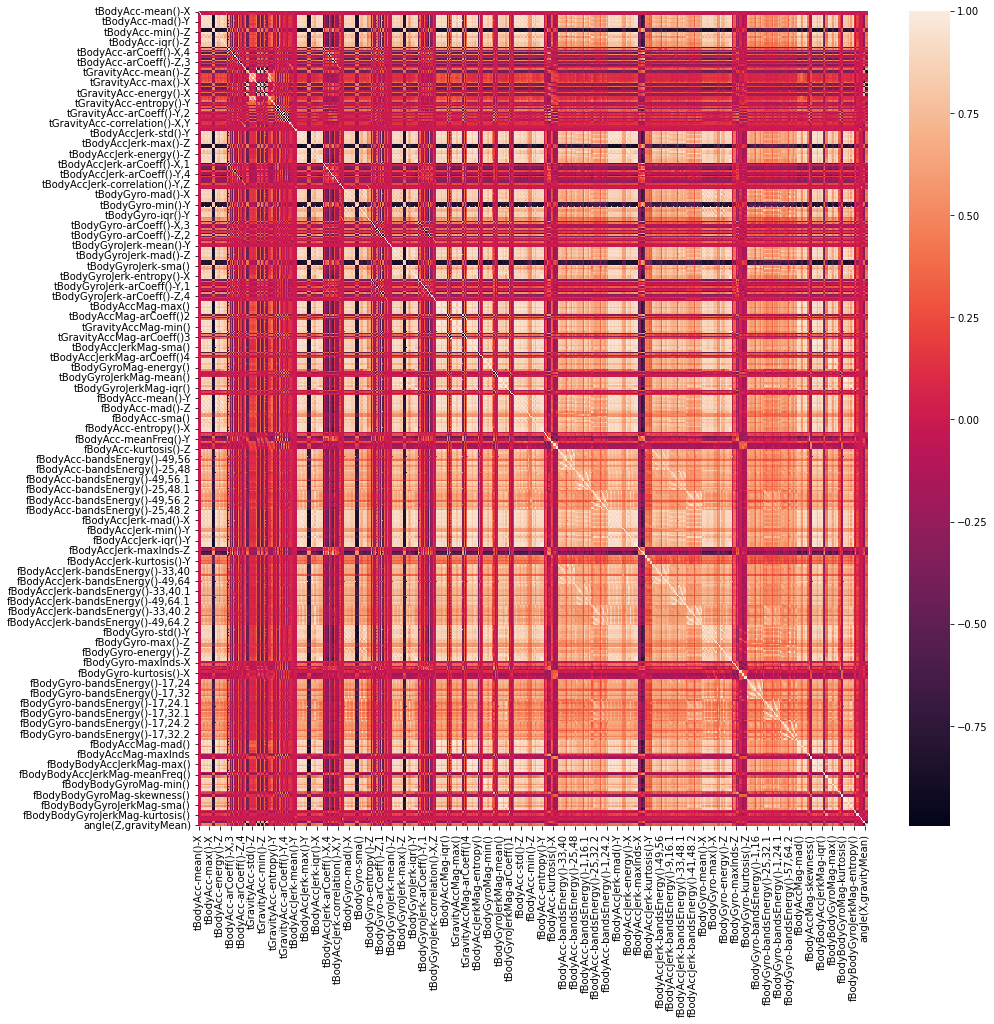

In [ ]:
# To visualise the correlation

%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(normalized_df.corr())
plt.show()

### Feature Column Selection

In [ ]:
# Calculate the correlation values
feature_cols = normalized_df.columns[:-1]
corr_values = normalized_df[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071
...,...,...,...,...
156515,"angle(tBodyGyroMean,gravityMean)","angle(X,gravityMean)",-0.007095,0.007095
156516,"angle(tBodyGyroMean,gravityMean)","angle(Y,gravityMean)",-0.006444,0.006444
156517,"angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)",0.024822,0.024822
156518,"angle(tBodyGyroJerkMean,gravityMean)","angle(Y,gravityMean)",-0.004582,0.004582


### High Corelated values

In [ ]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
92271,tBodyAccMag-std(),tGravityAccMag-std(),1.000000,1.000000
92986,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
93342,tBodyAccMag-min(),tGravityAccMag-min(),1.000000,1.000000
109246,tBodyGyroJerkMag-mean(),tBodyGyroJerkMag-sma(),1.000000,1.000000
92629,tBodyAccMag-mad(),tGravityAccMag-mad(),1.000000,1.000000
...,...,...,...,...
36225,"tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2",-0.991609,0.991609
22616,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39150,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38665,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628


## 3. Data Preparation

In [ ]:
x = normalized_df[feature_cols]
y = activity_data_na['Activity']
y.sample(5)

3881                 LAYING
1269     WALKING_DOWNSTAIRS
4760                SITTING
7442                WALKING
10104      WALKING_UPSTAIRS
Name: Activity, dtype: object

### Creating Train Sets for Case 1 and case 2

Case 1 : Train = 80 % Test = 20%  [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;

Case 2 : Train = 10 % Test = 90%  [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% ;

In [ ]:
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(x, y, test_size = 0.2)
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(x, y, test_size = 0.9)

In [ ]:
min_max = MinMaxScaler()
X_train1_norm = min_max.fit_transform(X_train_case1)
X_test1_norm = min_max.transform(X_test_case1)

X_train2_norm = min_max.fit_transform(X_train_case2)
X_test2_norm = min_max.transform(X_test_case2)

# ***Part B*** 
## Model Building


### 1. Perform Model Development using Logistic Regression with penalty='l2',C=0.01

### Logistic Regression with penalty='l2',C=0.01

In [ ]:
params = {"C" : 0.01, "class_weight" : "balanced", "max_iter" : 10000,
          "n_jobs" : -1, "penalty" : "l2", "random_state" : 42}
logistic_regression = LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
logistic_regression.set_params(**params)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000, n_jobs=-1,
                   random_state=42, solver='liblinear')

### Model Creation for case 1 and case 2

In [ ]:
#Build the Model
model1 = logistic_regression.fit(X_train1_norm,y_train_case1)
model2 = logistic_regression.fit(X_train2_norm,y_train_case2)

#Predict the Values
modelTrain1 = model1.predict(X_train1_norm)
modelTest1 = model1.predict(X_test1_norm)
modelTrain2 = model2.predict(X_train2_norm)
modelTest2 = model2.predict(X_test2_norm)

## 2. Train the model and print the training accuracy, Recall, F1 Score for case 1, case 2 separately.

### Accuracy for "Case 1" Train and Test data

In [ ]:
accuracy_train1 = accuracy_score(modelTrain1,y_train_case1)
accuracy_test1 = accuracy_score(modelTest1,y_test_case1)
print('\nThe Accuracy of prediction in training data for Logistic Regression Case 1 is {:.2f}' .format(accuracy_train1),
      '\nThe Accuracy of prediction in test data  for Logistic Regression Case 1is {:.2f}' .format(accuracy_test1))


The Accuracy of prediction in training data for Logistic Regression Case 1 is 0.87 
The Accuracy of prediction in test data  for Logistic Regression Case 1is 0.87


### Recall for "Case 1" Train and Test data

In [ ]:
recall_train1 = recall_score(modelTrain1,y_train_case1,average="micro")
recall_test1 = recall_score(modelTest1,y_test_case1,average="micro")

print('\nThe Recall of prediction for Logistic Regression Case 1 training data is {:.2f}' .format(recall_train1),
      '\nThe Recall of prediction for Logistic Regression Case 1 test data is {:.2f}' .format(recall_test1,))



The Recall of prediction for Logistic Regression Case 1 training data is 0.87 
The Recall of prediction for Logistic Regression Case 1 test data is 0.87


### F1 Score for "Case 1" Train and Test data

In [ ]:
f1_train1 = f1_score(y_train_case1, modelTrain1,average ='micro')
f1_test1 = f1_score(y_test_case1, modelTest1, average ='micro')
print('\nThe F1 score of prediction in training data is {:.2f}' .format(f1_train1),
      '\nThe F1 score of prediction in test data is {:.2f}' .format(f1_test1))


The F1 score of prediction in training data is 0.87 
The F1 score of prediction in test data is 0.87


### CONFUSION MATRIX for "Case 1" Train and Test data

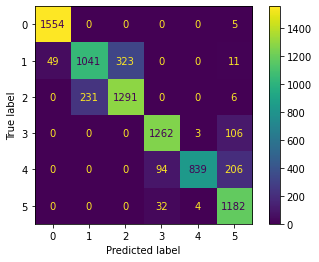

In [ ]:
ConfMatx1 = confusion_matrix(y_train_case1, modelTrain1)
ConfMatx1_display= ConfusionMatrixDisplay(confusion_matrix=ConfMatx1).plot()

###  Accuracy for "Case 2" Train and Test data

In [ ]:
accuracy_train2 = accuracy_score(modelTrain2,y_train_case2)
accuracy_test2 = accuracy_score(modelTest2,y_test_case2)
print('\nThe Accuracy of prediction in training data for Logistic Regression Case 2 is {:.2f}' .format(accuracy_train2),
      '\nThe Accuracy of prediction in test data  for Logistic Regression Case 2 is {:.2f}' .format(accuracy_test2))


The Accuracy of prediction in training data for Logistic Regression Case 2 is 0.89 
The Accuracy of prediction in test data  for Logistic Regression Case 2 is 0.88


###  Recall for "Case 2" Train and Test data

In [ ]:
recall_train2 = recall_score(modelTrain2,y_train_case2,average="micro")
recall_test2 = recall_score(modelTest2,y_test_case2,average="micro")

print('\nThe Recall of prediction for Logistic Regression Case 2 training data is {:.2f}' .format(recall_train2),
      '\nThe Recall of prediction for Logistic Regression Case 2 test data is {:.2f}' .format(recall_test2))



The Recall of prediction for Logistic Regression Case 2 training data is 0.89 
The Recall of prediction for Logistic Regression Case 2 test data is 0.88


###  F1_Score for "Case 2" Train and Test data

In [ ]:
f1_train2 = f1_score(y_train_case2, modelTrain2,average ='micro')
f1_test2 = f1_score(y_test_case2, modelTest2, average ='micro')
print('\nThe F1 score of prediction for Logistic Regression Case 2 in training data is {:.2f}' .format(f1_train2),
      '\nThe F1 score of prediction in Logistic Regression Case 2 test data is {:.2f}' .format(f1_test2))


The F1 score of prediction for Logistic Regression Case 2 in training data is 0.89 
The F1 score of prediction in Logistic Regression Case 2 test data is 0.88


###  Confusion Matrix for "Case 2" Train and Test data

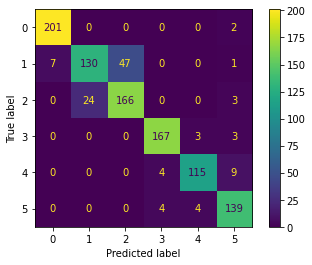

In [ ]:
ConfMatx2 = confusion_matrix(y_train_case2, modelTrain2)
ConfMatx2_display= ConfusionMatrixDisplay(confusion_matrix=ConfMatx2).plot()

Model Analysis

Case 1:-

The accuracy of Case 1 with 80% training data is 0.87, that of Case 2 with 10% training data is 0.89. This indicates that the model is 